In [1]:
from catinous.dataset import BatchDataset, ContinuousDataset
from catinous.dynamicmemory.DynamicMemoryModel import DynamicMemoryModel 
import catinous.dynamicmemory.DynamicMemoryModel as dmodel
import catinous.utils as cutils
import os
import pandas as pd
from py_jotools import mut, slurm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '240'}


hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplit.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 500,
    'noncontinuous_train_splits': ['base','train'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch49616
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch49616.job
Submitted batch job 3204031



In [13]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '240'}
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplit.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 500,
    'noncontinuous_train_splits': ['base'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch68947
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch68947.job
Submitted batch job 3204048



In [14]:
sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplit.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Canon',
     'noncontinuous_steps': 500,
    'noncontinuous_train_splits': ['base','train'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch78098
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch78098.job
Submitted batch job 3204189



In [7]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams = {
    'continuous': True,
    'use_memory': True,
    'datasetfile': '/project/catinous/cardiacslicessplit.csv',
    'base_model': 'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'seed': 1654130,
    'memorymaximum': 128}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_cont66253
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont66253.job
Submitted batch job 3205154



In [3]:
ds = ContinuousDataset.CardiacContinuous('/project/catinous/cardiacslicessplit.csv', order=['Siemens', 'GE', 'Philips', 'Canon'], seed=1654130)

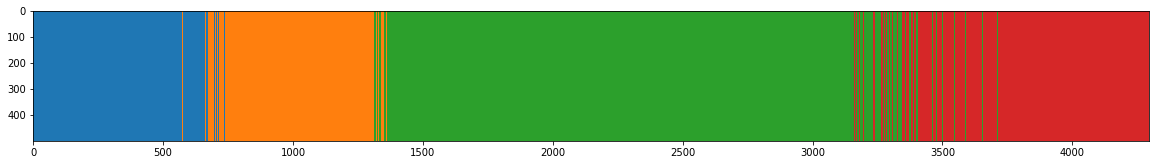

In [4]:
newcmp = ListedColormap([sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3]], name='OrangeBlue')
res = ds.df.scanner == 'Siemens'
res1 = ds.df.scanner == 'GE'
res2 = ds.df.scanner == 'Philips'
res3 = ds.df.scanner == 'Canon'
res[res1] = 2
res[res2] = 3
res[res3] = 4
plt.figure(figsize=(20,20))
plt.imshow(np.tile(res,(500,1)), cmap=newcmp)